In [21]:
import matplotlib.pyplot as plt

## Accuray dependence on K parameter

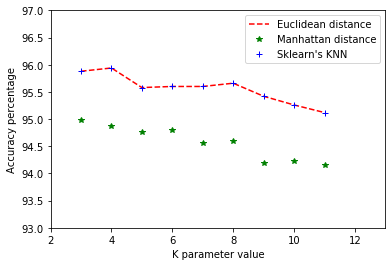

<Figure size 1440x1224 with 0 Axes>

In [11]:
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [95.88, 95.94, 95.58, 95.6, 95.6, 95.66, 95.42, 95.26, 95.12], 'r--', label="Euclidean distance")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [94.98, 94.88, 94.76, 94.8, 94.56, 94.6, 94.2, 94.22, 94.16], 'g*', label="Manhattan distance")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [95.88, 95.94, 95.58, 95.6, 95.6, 95.66, 95.42, 95.26, 95.12], 'b+', label="Sklearn's KNN")
plt.legend(loc='best')
plt.axis([2, 13, 93, 97])
plt.xlabel('K parameter value')
plt.ylabel('Accuracy percentage')
plt.figure(figsize=(20,17))
plt.show()

## F1 score vs K parameter

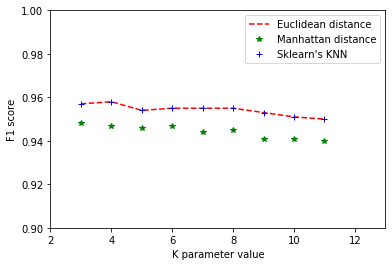

<Figure size 864x72 with 0 Axes>

In [20]:
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [0.957, 0.958, 0.954, 0.955, 0.955, 0.955, 0.953, 0.951, 0.950], 'r--', label="Euclidean distance")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [0.948, 0.947, 0.946, 0.947, 0.944, 0.945, 0.941, 0.941, 0.940], 'g*', label="Manhattan distance")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], [0.957, 0.958, 0.954, 0.955, 0.955, 0.955, 0.953, 0.951, 0.950], 'b+', label="Sklearn's KNN")
plt.legend(loc='best')
plt.axis([2, 13, 0.9, 1])
plt.xlabel('K parameter value')
plt.ylabel('F1 score')
# plt.figure(figsize=(12,1))
plt.show()

## Confusion Matrix for K = 5

### Euclidean distance

$$\begin{bmatrix} 536 & 0 & 0 & 0 & 0 & 1 & 3 & 0 & 0 & 0 \\ 0 & 572 & 0 & 0 & 1 & 0 & 0 & 2 & 1 & 1 \\ 2 & 1 & 455 & 3 & 1 & 0 & 2 & 12 & 1 & 0 \\ 2 & 3 & 5 & 458 & 1 & 7 & 0 & 4 & 2 & 3 \\ 1 & 7 & 0 & 0 & 431 & 0 & 3 & 2 & 0 & 14 \\ 3 & 4 & 0 & 5 & 1 & 404 & 7 & 2 & 1 & 5 \\ 2 & 1 & 0 & 0 & 1 & 3 & 493 & 0 & 0 & 0 \\ 0 & 5 & 2 & 1 & 0 & 1 &  0 & 523 & 0 & 11 \\ 3 & 5 &  2 & 15 &  1 & 9 &  2 &  5 & 443 & 6 \\2  & 2 &  1 &  5 & 11 &  3 &  0 & 8 &  1 & 464 \\ \end{bmatrix}$$

### Manhattan distance


$$\begin{bmatrix} 534 & 0 & 0 & 0 & 0 & 1 & 5 & 0 & 0 & 0 \\ 0 & 573 & 0 & 0 & 1 & 0 & 0 & 2 & 1 & 0 \\ 2 & 5 & 450 & 2 & 1 & 0 & 3 & 14 & 0 & 0 \\ 2 & 4 & 4 & 457 & 0 & 10 & 1 & 4 & 0 & 3 \\ 0 & 9 & 0 & 0 & 430 & 0 & 3 & 1 & 0 & 15 \\ 5 & 5 & 0 & 6 & 0 & 400 & 7 & 2 & 1 & 6 \\ 2 & 1 & 0 & 0 & 1 & 3 & 493 & 0 & 0 & 0 \\ 0 & 6 & 1 & 1 & 2 & 1 &  0 & 522 & 0 & 10 \\ 3 & 15 &  2 & 13 &  3 & 14 &  4 &  4 & 423 & 10 \\3  & 4 &  0 &  6 & 10 &  2 &  0 & 15 &  1 & 456 \\ \end{bmatrix}$$

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import math
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
import numpy as np
import math
import time

class KNNClassifier:

    def __init__(self, k_value=5):
        self.k_parameter = k_value
        self.data_arr = None
        self.train_res = None

    def train(self, dar):
        # self.data_arr = np.genfromtxt(train_dataframe_path, delimiter = ',')
        self.data_arr = dar
        self.train_res = self.data_arr[:,0]
        self.data_arr = self.data_arr[:, 1:]

    def predict(self, test_egs):
        # test_egs = np.genfromtxt(test_dataframe_path, delimiter = ',')
        prediction_list = []
        for test_ind in range(test_egs.shape[0]):
            lis = []
            test_row = test_egs[test_ind,:]
            hashmap = [0 for i in range(10)]
            for train_ind in range(self.data_arr.shape[0]):
                train_row = self.data_arr[train_ind,:]
                diff = test_row - train_row
                diff = diff*diff
                dist = (diff.sum())
                lis.append([dist, self.train_res[train_ind]])
                lis = sorted(lis, key=lambda pair:pair[0])
                lis = lis[0:self.k_parameter]
            for pair in lis:
                hashmap[int(pair[1])] += 1
            maxval = hashmap[0]
            ind = 0
            for iter in range(1,10):
                val = hashmap[iter]
                if val > maxval:
                    maxval = val
                    ind = iter
            prediction_list.append(ind)
        return prediction_list

In [3]:
euclid_accuracy_self = []
accuracy_sklearn = []
train_arr = np.genfromtxt("./Datasets/q1/train.csv", delimiter=',')
np.random.shuffle(train_arr)
valid_arr = train_arr[0:5000,:]
valid_res = valid_arr[:,0]
valid_arr = valid_arr[:,1:]
train_arr = train_arr[5000:,:]
s_arr = train_arr.copy()
train_res = s_arr[:,0]
s_arr = s_arr[:,1:]
for k in range(3, 12):
    print("k = "+str(k))
    cfr = KNNClassifier(k)
    cfr.train(train_arr)
    pl = cfr.predict(valid_arr)
    euclid_accuracy_self.append(accuracy_score(valid_res, pl))
    print("F1 score "+str(f1_score(valid_res, pl, average='macro')))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=1)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=2)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=3)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=4)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=5)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=6)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=7)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=8)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=9)))
    if k==5:
        print(confusion_matrix(valid_res, pl))
    sk_class = KNeighborsClassifier(k)
    sk_class.fit(s_arr, train_res)
    pl = sk_class.predict(valid_arr)
    accuracy_sklearn.append(accuracy_score(valid_res, pl))
    print("F1 score "+str(f1_score(valid_res, pl, average='macro')))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=1)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=2)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=3)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=4)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=5)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=6)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=7)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=8)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=9)))

k = 3
F1 score 0.9579501454018466
F1 score 0.9579501454018466
k = 4
F1 score 0.9586163998048388
F1 score 0.9586163998048388
k = 5
F1 score 0.9549842874584404
[[536   0   0   0   0   1   3   0   0   0]
 [  0 572   0   0   1   0   0   2   1   1]
 [  2   1 455   3   1   0   2  12   1   0]
 [  2   3   5 458   1   7   0   4   2   3]
 [  1   7   0   0 431   0   3   2   0  14]
 [  3   4   0   5   1 404   7   2   1   5]
 [  2   1   0   0   1   3 493   0   0   0]
 [  0   5   2   1   0   1   0 523   0  11]
 [  3   5   2  15   1   9   2   5 443   6]
 [  2   2   1   5  11   3   0   8   1 464]]
F1 score 0.9549842874584404
k = 6
F1 score 0.9553031063220955
F1 score 0.9553031063220955
k = 7
F1 score 0.9553785635673787
F1 score 0.9553785635673787
k = 8
F1 score 0.9559831007429856
F1 score 0.9559831007429856
k = 9
F1 score 0.9535352795213108
F1 score 0.9535352795213108
k = 10
F1 score 0.9518638098454062
F1 score 0.9518638098454062
k = 11
F1 score 0.9503864230165272
F1 score 0.9503864230165272


In [4]:
class KNNClassifier_man:

    def __init__(self, k_value=5):
        self.k_parameter = k_value
        self.data_arr = None
        self.train_res = None

    def train(self, dar):
        # self.data_arr = np.genfromtxt(train_dataframe_path, delimiter = ',')
        self.data_arr = dar
        self.train_res = self.data_arr[:,0]
        self.data_arr = self.data_arr[:, 1:]

    def predict(self, test_egs):
        # test_egs = np.genfromtxt(test_dataframe_path, delimiter = ',')
        prediction_list = []
        for test_ind in range(test_egs.shape[0]):
            lis = []
            test_row = test_egs[test_ind,:]
            hashmap = [0 for i in range(10)]
            for train_ind in range(self.data_arr.shape[0]):
                train_row = self.data_arr[train_ind,:]
                diff = test_row - train_row
                diff = np.absolute(diff)
                dist = (diff.sum())
                lis.append([dist, self.train_res[train_ind]])
                lis = sorted(lis, key=lambda pair:pair[0])
                lis = lis[0:self.k_parameter]
            for pair in lis:
                hashmap[int(pair[1])] += 1
            maxval = hashmap[0]
            ind = 0
            for iter in range(1,10):
                val = hashmap[iter]
                if val > maxval:
                    maxval = val
                    ind = iter
            prediction_list.append(ind)
        return prediction_list

In [8]:
manhattan_accuracy_self = []
# accuracy_sklearn = []
# train_arr = np.genfromtxt("/content/gdrive/My Drive/Datasets/q1/train.csv", delimiter=',')
# np.random.shuffle(train_arr)
# valid_arr = train_arr[0:5000,:]
# valid_res = valid_arr[:,0]
# valid_arr = valid_arr[:,1:]
# train_arr = train_arr[5000:,:]
# s_arr = train_arr.copy()
# train_res = s_arr[:,0]
s_arr = s_arr[:,1:]
for k in range(3, 12):
    print("k = "+str(k))
    cfr = KNNClassifier_man(k)
    cfr.train(train_arr, )
    print("trained")
    pl = cfr.predict(valid_arr)
    print("predicted")
#     print(valid_res.shape)
#     print(pl.shape)
    manhattan_accuracy_self.append(accuracy_score(valid_res, pl))
    if k==5:
        print(confusion_matrix(valid_res, pl))
    print("F1 score "+str(f1_score(valid_res, pl, average='macro')))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=1)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=2)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=3)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=4)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=5)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=6)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=7)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=8)))
#     print("F1 score "+str(f1_score(valid_res, pl, average='binary', pos_label=9)))
    # sk_class = KNeighborsClassifier(k)
    # sk_class.fit(s_arr, train_res)
    # pl = sk_class.predict()
    # accuracy_sklearn.append(accuracy_score(valid_res, pl))

k = 3
trained
predicted
F1 score 0.9489633256057246
k = 4
trained
predicted
F1 score 0.9479986435731027
k = 5
trained
predicted
[[534   0   0   0   0   1   5   0   0   0]
 [  0 573   0   0   1   0   0   2   1   0]
 [  2   5 450   2   1   0   3  14   0   0]
 [  2   4   4 457   0  10   1   4   0   3]
 [  0   9   0   0 430   0   3   1   0  15]
 [  5   5   0   6   0 400   7   2   1   6]
 [  2   1   0   0   1   3 493   0   0   0]
 [  0   6   1   1   2   1   0 522   0  10]
 [  3  15   2  13   3  14   4   4 423  10]
 [  3   4   0   6  10   2   0  15   1 456]]
F1 score 0.9467686320643255
k = 6
trained
predicted
F1 score 0.9474649961547531
k = 7
trained
predicted
F1 score 0.9448616772774201
k = 8
trained
predicted
F1 score 0.9453565948581863
k = 9
trained
predicted
F1 score 0.941269420583364
k = 10
trained
predicted
F1 score 0.9415563707442705
k = 11
trained
predicted
F1 score 0.9409626231098658


In [9]:
print(euclid_accuracy_self)
print(accuracy_sklearn)
print(manhattan_accuracy_self)

[0.9588, 0.9594, 0.9558, 0.956, 0.956, 0.9566, 0.9542, 0.9526, 0.9512]
[0.9588, 0.9594, 0.9558, 0.956, 0.956, 0.9566, 0.9542, 0.9526, 0.9512]
[0.9498, 0.9488, 0.9476, 0.948, 0.9456, 0.946, 0.942, 0.9422, 0.9416]
